# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

* Hiring and retaining employees are extremely complex tasks that require capital, time and skills.
* "Small business owners spend 40% of their working hours on tasks that do not generate any income such as hiring".
* "Companies spend 15% - 20% of the employee's salary to recruit a new candidate".

[Source](https://toggl.com/blog/cost-of-hiring-an-employee)

* "An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed".
Hiring a new employee costs an average of $7645 (0 - 500 corporation).
* It takes 52 days on average to fill a position.

[Source](https://toggl.com/blog/cost-of-hiring-an-employee)

* The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are more likely to quit.
* The team provided you with an extensive data, here's a sample of the dataset:
    * JobInvolvement
    * Education
    * JobSatisfaction
    * PerformancRating
    * RelationshipSatisfaction
    * WorkLifeBalance

[DataSource](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# You have to include the full link to the csv file containing your dataset
cwd = os.getcwd()
data_dir_path = os.path.join(cwd, "data")
data_file = os.path.join(data_dir_path, "Human_Resources.csv")

employee_df = pd.read_csv(data_file)

In [ ]:
employee_df

In [ ]:
employee_df.head(5)

In [ ]:
employee_df.tail(5)

In [ ]:
# use describe and info and find how many features have data type of int64.
numeric_features = employee_df.select_dtypes(include=['int64']).shape[1]
numeric_features

In [ ]:
# get the mean of the age column
age_mean = employee_df['Age'].mean()
age_mean

# VISUALIZE DATASET

In [ ]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes': 1, 'No': 0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes': 1, 'No': 0})
employee_df['Over18'] = employee_df['Over18'].map({'Y': 1, 'N': 0})

In [ ]:
# business travel conversion
employee_df['BusinessTravel'] = employee_df['BusinessTravel'].map({
    'Travel_Rarely': 0,
    'Travel_Frequently': 1,
    'Non-Travel': 2
})

In [ ]:
# sales conversion
employee_df['Department'] = employee_df['Department'].map({
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
})

In [ ]:
# education conversion
employee_df['EducationField'] = employee_df['EducationField'].map({
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Human Resources': 4,
    'Other': 5
})

In [ ]:
# gender conversion
employee_df['Gender'] = employee_df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# job role conversion
employee_df['JobRole'] = employee_df['JobRole'].map({
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
})

In [ ]:
# marital status conversion
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2
})

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
employee_df.hist(bins=30, figsize=(20, 20), color='red')
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [ ]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [ ]:
employee_df

In [ ]:
# Let's see how many employees left the company!
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
# Count the number of employees who stayed and left
print("Total number of employees:", employee_df.shape[0])
print("Number of employees who stayed:", stayed_df.shape[0])
print("Number of employees who left:", left_df.shape[0])

print("Percentage of employees who stayed: {:.2f}%".format((stayed_df.shape[0] / employee_df.shape[0]) * 100))
print("Percentage of employees who left: {:.2f}%".format((left_df.shape[0] / employee_df.shape[0]) * 100))

# It seems that we are dealing with an imbalanced dataset

# plot the number of employees who stayed, left. percentage of employees who stayed and left
row_counts = pd.Series({'Left': left_df.shape[0], 'Stayed': stayed_df.shape[0]})
plt.figure(figsize=(10, 5))
row_counts.plot(kind='bar', color=['red', 'green'])

In [ ]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

In [ ]:
stayed_df.describe()

In [ ]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


In [ ]:
# business travel conversion
employee_df['BusinessTravel'] = employee_df['BusinessTravel'].map({
    0:'Travel_Rarely',
    1: 'Travel_Frequently',
    2: 'Non-Travel'
})

# sales conversion
employee_df['Department'] = employee_df['Department'].map({
    0: 'Sales',
    1: 'Research & Development',
    2: 'Human Resources'
})

# education conversion
employee_df['EducationField'] = employee_df['EducationField'].map({
    0: 'Life Sciences',
    1: 'Medical',
    2: 'Marketing',
    3: 'Technical Degree',
    4: 'Human Resources',
    5: 'Other'
})

# gender conversion
employee_df['Gender'] = employee_df['Gender'].map({0: 'Male', 1: 'Female'})

# job role conversion
employee_df['JobRole'] = employee_df['JobRole'].map({
    0: 'Sales Executive',
    1: 'Research Scientist',
    2: 'Laboratory Technician',
    3: 'Manufacturing Director',
    4: 'Healthcare Representative',
    5: 'Manager',
    6: 'Sales Representative',
    7: 'Research Director',
    8: 'Human Resources'
})

# marital status conversion
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].map({
    0: 'Single',
    1: 'Married',
    2: 'Divorced'
})

In [ ]:
plt.figure(figsize=(25, 12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 1, 1)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 2)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 4)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

In [ ]:

# KDE (Kernel Density Estimation) is used for visualizing the Probability Density of a continuous variable.
# KDE describes the probability density at different values in a continuous variable.

plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who stayed', fill=True, color='green')

plt.xlabel('Distance from Home')

In [ ]:
# KDE for years with current manager
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees who stayed', fill=True, color='green')
plt.xlabel('Years with Current Manager')

In [ ]:

# KDE for total working years
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who stayed', fill=True, color='green')
plt.xlabel('Total Working Years')

In [ ]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

In [ ]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

# CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
employee_df.head(3)

In [ ]:
# capture catagorical features
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [ ]:
X_cat

In [ ]:
# convert categorical features to numerical using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
#onehost_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehost_encoder = OneHotEncoder()
X_cat = onehost_encoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat

In [ ]:
X_cat.shape

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

In [ ]:
# note that we dropped the target 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                            'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear',
                            'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]


In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis=1)

In [ ]:
X_all

In [ ]:
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)
X = scaler.fit_transform(X_all)

In [ ]:
X

In [ ]:
y = employee_df['Attrition']
y

# UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

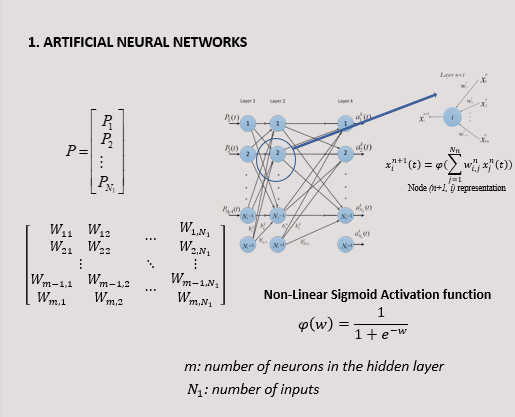

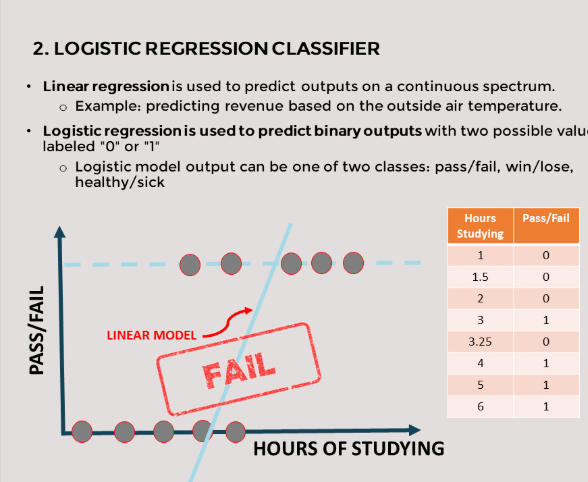

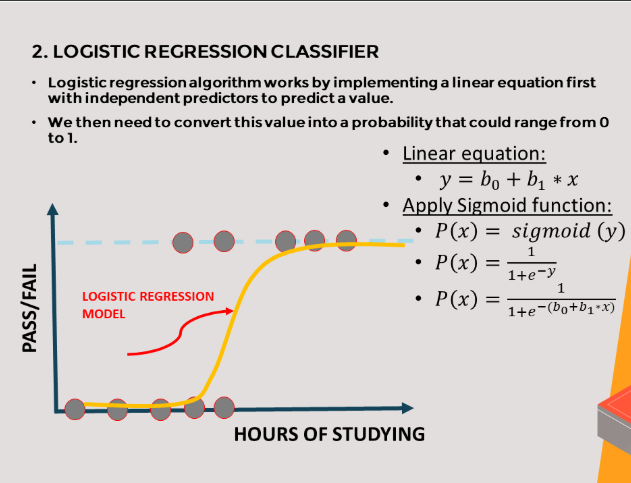

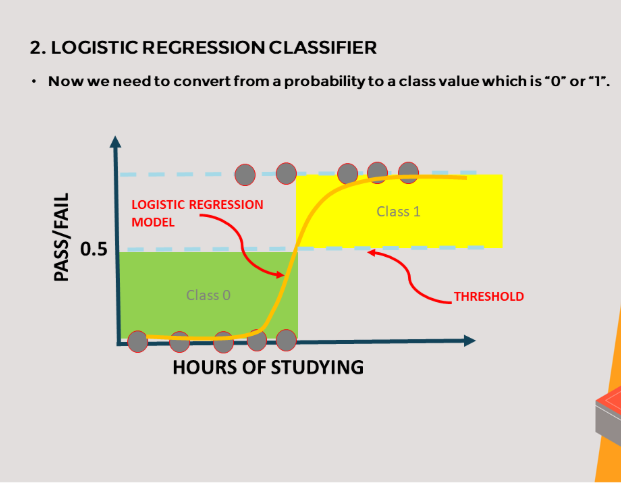

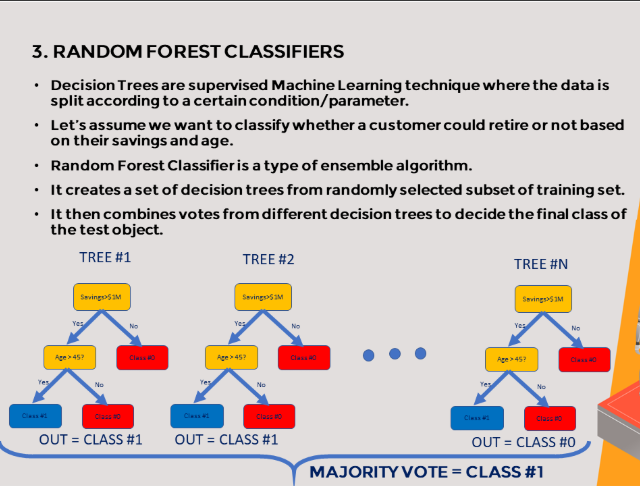

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

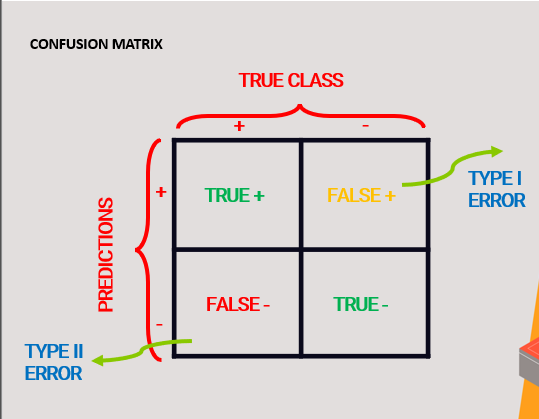

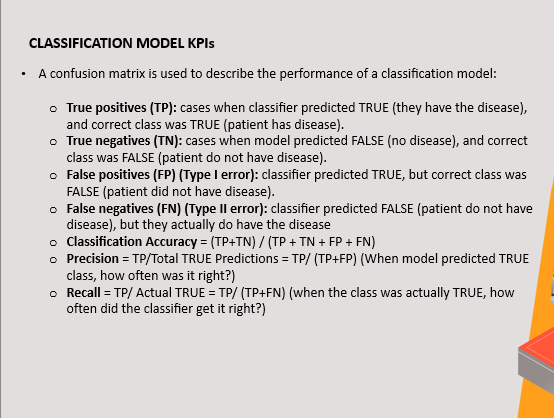

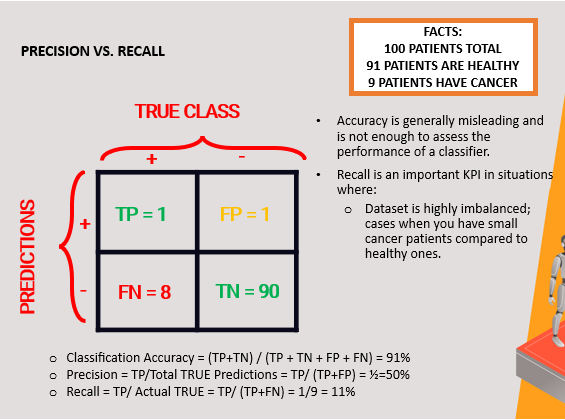

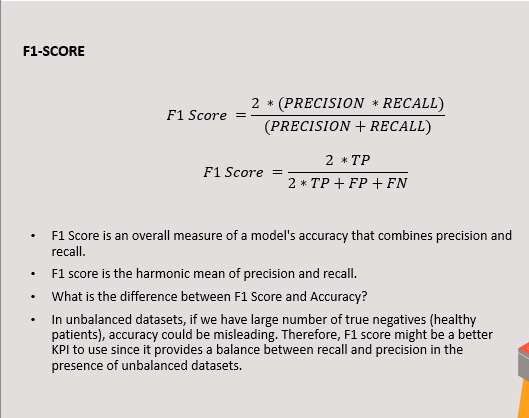

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Testing Set Performance
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {}%'.format(100 * accuracy_score(y_pred, y_test)))

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

# TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#epoch_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)
epoch_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


In [ ]:
y_pred


In [ ]:
plt.plot(epoch_hist.history['loss'], label='loss')

In [ ]:
plt.plot(epoch_hist.history['accuracy'], label='Accuracy')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS